# PREGUNTA 3

---

# Configuración y Visualización del Entorno

## Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [1]:
import sys
sys.path.insert(0, '..')

## Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [2]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'mlxtend' : '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# Código Fuente

In [4]:
columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Target']
df = pd.read_csv("dataset_classification.csv", 
                 sep=',',
                 usecols=columns)

In [5]:
dataset_classification_anonymized = df.drop(["Target"], axis=1)
dataset_classification_anonymized.to_csv('dataset_classification_anonymized.csv', index=False)
dataset_classification_anonymized.corr()

,Col1,Col2,Col3,Col4,Col5,Col6
Col1,1.000000e+00,-7.136661e-17,9.276252e-17,2.241006e-17,5.806663e-17,-2.210166e-17
Col2,-7.136661e-17,1.000000e+00,9.367507e-17,-4.701469e-17,4.684677e-17,-3.293844e-17
Col3,9.276252e-17,9.367507e-17,1.000000e+00,1.254194e-16,-4.568295e-17,9.402938e-17
Col4,2.241006e-17,-4.701469e-17,1.254194e-16,1.000000e+00,1.518145e-16,-9.765851e-17
Col5,5.806663e-17,4.684677e-17,-4.568295e-17,1.518145e-16,1.000000e+00,-3.652788e-17
Col6,-2.210166e-17,-3.293844e-17,9.402938e-17,-9.765851e-17,-3.652788e-17,1.000000e+00


In [6]:
X = dataset_classification_anonymized
y = df.get("Target")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [   0 1210  384   65   69]
Labels counts in y_train: [  0 907 288  49  52]
Labels counts in y_test: [  0 303  96  16  17]


In [9]:
from sklearn.tree import DecisionTreeClassifier

# PARÁMETROS POR DEFECTO
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

# PARÁMETROS ÓPTIMOS
# tree_model = DecisionTreeClassifier(criterion='gini', 
#                                     max_depth=10, 
#                                     random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

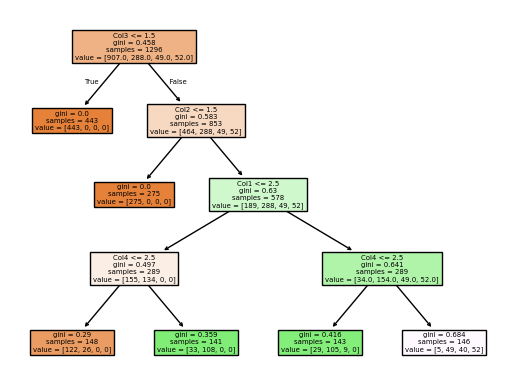

Misclassification samples: 67
580     False
1218    False
468     False
1284    False
980     False
        ...  
1719    False
105     False
561     False
852     False
1251    False
Name: Target, Length: 432, dtype: bool
Accuracy: 0.845


In [10]:
from sklearn import tree
feature_names = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()
y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

In [11]:
input_data = pd.DataFrame([[1, 3, 1, 2, 3, 2]], columns=feature_names)
print(f'Class probability: {tree_model.predict_proba(input_data)}')
print('Most probable class: %d' % tree_model.predict(input_data)[0])

Class probability: [[1. 0. 0. 0.]]
Most probable class: 1


---

# Convertir Jupyter Notebook a Fichero Python

In [12]:
! python .convert_notebook_to_script.py --input answer3.ipynb --output answer3.py

[NbConvertApp] Converting notebook answer3.ipynb to script
[NbConvertApp] Writing 3697 bytes to answer3.py
